In [158]:
import fiona
import collections
import matplotlib.pyplot as plt
import pyproj
import rasterio
import rasterio.mask
from rasterio.plot import show
from rasterio import features

In [176]:
#freguesias_shapes = fiona.open("cont-aad-caop2017/Cont_AAD_CAOP2017.shp")
freguesias_shapes=fiona.open("gadm36_PRT_shp/gadm36_PRT_3.shp")
concelhos_shapes = fiona.open("gadm36_PRT_shp/gadm36_PRT_2.shp")
fp = r'map/S1B_IW_GRDH_1SDV_20210318T182642_20210318T182707_026073_031C67_7018.SAFE/measurement/s1b-iw-grd-vh-20210318t182642-20210318t182707-026073-031c67-002.tiff'
img = rasterio.open(fp,crs='EPSG:4326')

In [ ]:
coords = ( #Lon, Lat / X, Y order
 (-9.176870, 39.789471),
 (-6.214612, 40.188492),
 (-5.902303, 38.687416),
 (-8.801752, 38.287086),
 (-9.176870, 39.789471)
)

In [150]:
for shp in freguesias_shapes:
    #print(shp['properties']['NAME_3'])
    if shp['properties']['NAME_3']=='Cardigos' :
        cardigos_shp = shp
for shp in concelhos_shapes:
    if 'Mação' in shp['properties']['NAME_2']:
        macao_shp = shp

In [151]:
cardigos_x = [point[0] for point in cardigos_shp['geometry']['coordinates'][0]]
cardigos_y = [point[1] for point in cardigos_shp['geometry']['coordinates'][0]]
macao_x = [point[0] for point in macao_shp['geometry']['coordinates'][0]]
macao_y = [point[1] for point in macao_shp['geometry']['coordinates'][0]]

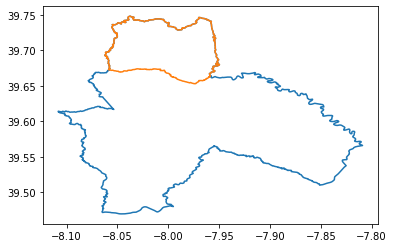

In [152]:
plt.figure()
plt.plot(macao_x,macao_y)
plt.plot(cardigos_x,cardigos_y)

plt.show()

In [ ]:
feat1 = [macao_shp['geometry']]
with rasterio.open(fp) as src:
        out_image, out_transform = rasterio.mask.mask(src, feat1,crop=True)
        out_meta = src.meta.copy()  

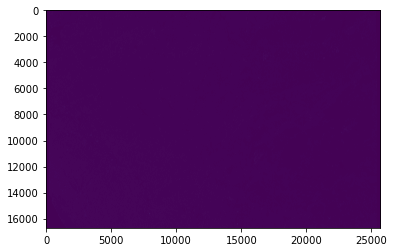

<AxesSubplot:>

In [181]:
show(img)